# Predictive Analysis, Supervised Learning – Titanic

classifying a large set of data based on a set of pre-classified samples




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# read txt files as pandas df
titanic_train = pd.read_csv("titanic_train.csv")
titanic_test = pd.read_csv("titanic_test.csv")



# EDA

In [2]:
# display train df
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Description 

-  Survived: 0 = Died, 1 = Survived


-  Pclass: A proxy for Socio-Economic Status (SES). 
        1st = Upper
        2nd = Middle
        3rd = Lower
        
-  Age: Age in years. It is fractional if less than 1. If the age is estimated, it is in the form of xx.5. 


-  SibSp: The number of siblings/spouses aboard the Titanic. The dataset defines family relations in this way:
        Sibling = brother, sister, stepbrother, stepsister
        Spouse = husband, wife (mistresses and fiancés were ignored)
        
-  Parch: The number of parents/children aboard the Titanic. The dataset defines family relations in this way:
        Parent = mother, father
        Child = daughter, son, stepdaughter, stepson
        Some children travelled only with a nanny, therefore Parch = 0 for them.
        
-  Embarked: The port of embarkation:
        C = Cherbourg 
        Q = Queenstown 
        S =Southampton

-  Ticket: The ticket number.


-  Fare: The passenger fare.


-  Cabin: The cabin number.

In [3]:
# descriptive stat
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see that:

    - 38% out of the training-set survived the Titanic.
    - features 'Age', 'Cabin', and 'Embarked' have some missing values.
    - 'Name', 'Sex', 'Ticket', 'Cabin' and 'Embarked' have data type object.

In [4]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In order to machine learning algorithms to run, we need to convert non numerical features into numeric. And treating for missing values is required. Also, we need to scale the data that is about the same.

Looking at the features even without an analysis, we can see that features like, 'PassengerID', 'Name' and 'Ticket' won't have any significance towards the survival.

### Corelation Analysis

1. Pclass

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

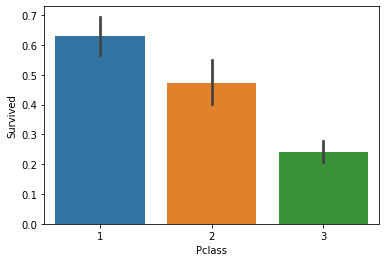

In [5]:
sns.barplot(x = 'Pclass', y = 'Survived', data = titanic_train)

We can see that Pclass feature is highly corealted with the survival rate. If the passenger was in class 1 he/she has high chance of survival unlike passengers in class 3.

2. Sex and Age


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


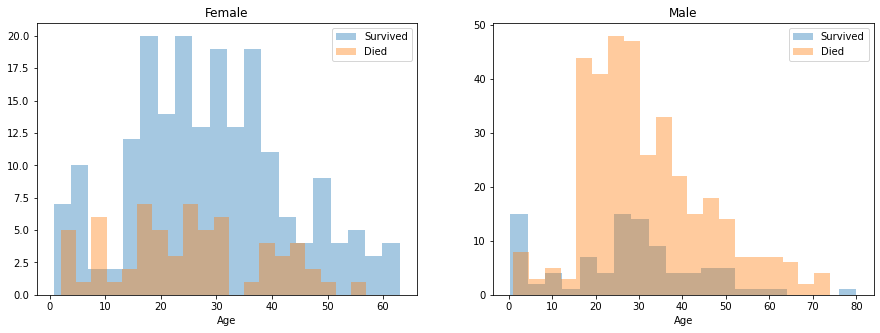

In [6]:
survived = 'Survived'
died = 'Died'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))

female = titanic_train[titanic_train['Sex'] == 'female']
ax = sns.distplot(female[female['Survived'] == 1].Age.dropna(), 
                  bins = 20, label = survived, ax = axes[0], kde = False)
ax = sns.distplot(female[female['Survived'] == 0].Age.dropna() , 
                  bins = 20, label = died, ax = axes[0], kde = False)
ax.legend()
ax.set_title('Female')


male = titanic_train[titanic_train['Sex'] == 'male']
ax = sns.distplot(male[male['Survived'] == 1].Age.dropna(), 
                  bins = 20, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(male[male['Survived'] == 0].Age.dropna() , 
                  bins = 20, label = died, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')


If the female passenger is between the 13 to 41 years of age, there is higher chance of survival.

If the passenger is male and in age between 16 to 36, there's a high chance of survival.

3. SibSp and Parch

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/o

Text(0.5, 0.98, 'Parents/ Children aboard')

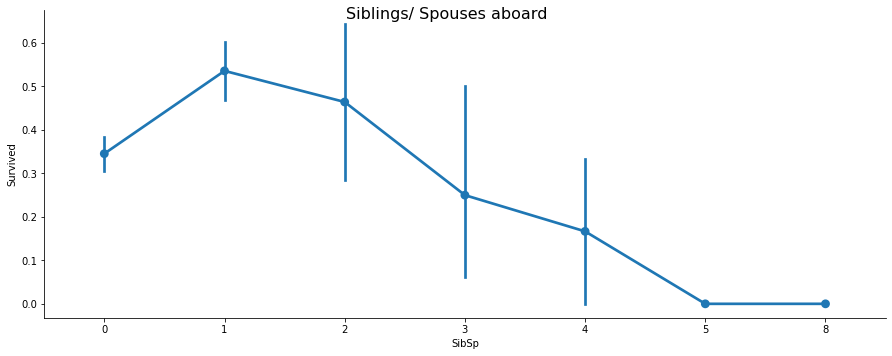

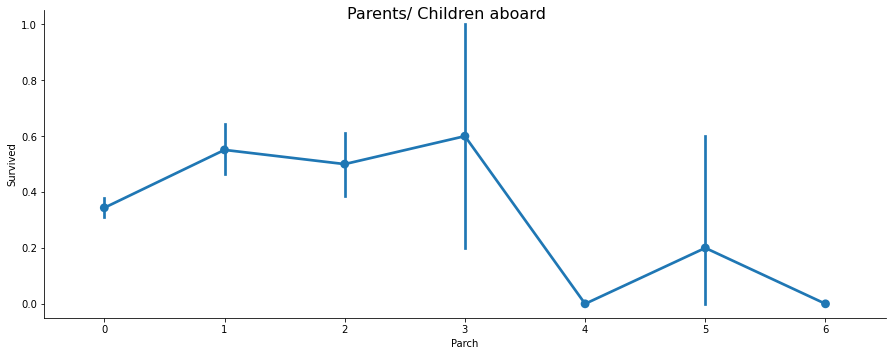

In [7]:
axe1 = sns.factorplot('SibSp','Survived', data = titanic_train, 
                      aspect = 2.5, )
axe1.fig.suptitle('Siblings/ Spouses aboard', fontsize= 16)

axe2 = sns.factorplot('Parch','Survived', data = titanic_train, 
                      aspect = 2.5, )
axe2.fig.suptitle('Parents/ Children aboard', fontsize= 16)

If the passenger was with the spouse or with 1 sibling, there's high chance of survival. Also, if the passenger had the 3 sum of parents and/or childresn, there's a high chance of survival.

4. Embarked and Sex

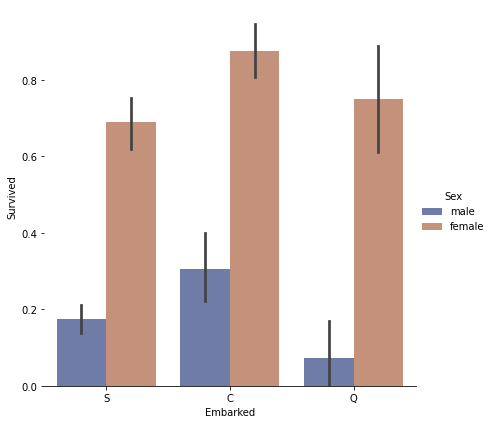

In [8]:
axes = sns.catplot(
    data = titanic_train, kind = "bar",
    x = "Embarked", y = "Survived", hue="Sex", 
    palette = "dark", alpha = .6, height = 6)
axes.despine(left = True)


It seems the women embarked on port C has the highest rate of survival. Same applies to the men at port C. Women from Q are to survive than women from port S. But for the men, it's the opposite.

5. Fare and Pclass

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

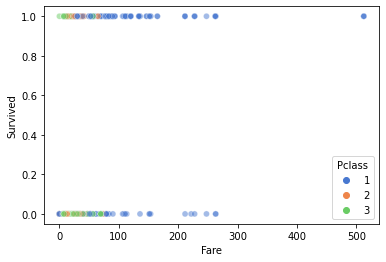

In [9]:
sns.scatterplot(x = "Fare", y = "Survived", hue = "Pclass",
            sizes = (40, 400), alpha = .5, palette = "muted", 
             data = titanic_train)

Fare does not show the relevant significance towards distinguishing survival or not.

### Treating Missing Values

In [10]:
# Age

titanic = [titanic_train, titanic_test]

for dataset in titanic:
    mean = titanic_train["Age"].mean()
    std = titanic_test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    
    # compute random numbers between the mean, std and is_null
    age_rand = np.random.randint(mean - std, mean + std, size = is_null)
    
    # fill NaN values in Age column with random values generated
    age_c = dataset["Age"].copy()
    age_c[np.isnan(age_c)] = age_rand
    dataset["Age"] = age_c
    dataset["Age"] = titanic_train["Age"].astype(int)
    
titanic_train["Age"].isnull().sum()


0

In [11]:
# Cabin

titanic_train["Cabin"].isnull().sum()

687

Since Cabin feature has huge missing data, I decided to drop it from both training and test datasets.

In [12]:
# drop the cabin feature
titanic_train = titanic_train.drop(['Cabin'], axis = 1)
titanic_test = titanic_test.drop(['Cabin'], axis = 1)


In [13]:
# Embarked

titanic_train["Embarked"].isnull().sum()

2

Embaked has only two missing values. Therefore we can add most common value

In [14]:
titanic_train['Embarked'].describe()


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [15]:
top = 'S'

titanic = [titanic_train, titanic_test]

for dataset in titanic:
    dataset['Embarked'] = dataset['Embarked'].fillna(top)

In [16]:
# dropping features that aren't significant towrds the survival

# PassengerID
titanic_train = titanic_train.drop(['PassengerId'], axis=1)

# Name
titanic_train = titanic_train.drop(['Name'], axis=1)
titanic_test = titanic_test.drop(['Name'], axis=1)

# Ticket
titanic_train = titanic_train.drop(['Ticket'], axis=1)
titanic_test = titanic_test.drop(['Ticket'], axis=1)

# Fare
titanic_train = titanic_train.drop(['Fare'], axis=1)
titanic_test = titanic_test.drop(['Fare'], axis=1)

### Type Conversion

In [17]:
# Sex
sex = {"male": 0, "female": 1}

titanic = [titanic_train, titanic_test]

for dataset in titanic:
    dataset['Sex'] = dataset['Sex'].map(sex)


In [18]:
# Embarked
port_no = {"S": 0, "C": 1, "Q": 2}

titanic = [titanic_train, titanic_test]

for dataset in titanic:
    dataset['Embarked'] = dataset['Embarked'].map(port_no)

In [19]:
titanic_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22,1,0,0
1,1,1,1,38,1,0,1
2,1,3,1,26,0,0,0
3,1,1,1,35,1,0,0
4,0,3,0,35,0,0,0
5,0,3,0,29,0,0,2
6,0,1,0,54,0,0,0
7,0,3,0,2,3,1,0
8,1,3,1,27,0,2,0
9,1,2,1,14,1,0,1


### Category Creation

In [20]:
# Age

titanic = [titanic_train, titanic_test]


for dataset in titanic:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 12, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 12) & (dataset['Age'] <= 19), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 19) & (dataset['Age'] <= 25), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 29), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 29) & (dataset['Age'] <= 35), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 44), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 44) & (dataset['Age'] <= 58), 'Age'] = 6
    dataset.loc[(dataset['Age'] > 58) & (dataset['Age'] <= 66), 'Age'] = 7
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 8




In [21]:
titanic_train['Age'].value_counts()

2    170
5    149
4    147
1    127
3    114
6     87
0     69
7     21
8      7
Name: Age, dtype: int64

In [22]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,2,1,0,0
1,1,1,1,5,1,0,1
2,1,3,1,3,0,0,0
3,1,1,1,4,1,0,0
4,0,3,0,4,0,0,0


### Add New Feature

In [23]:
# Age and Pclass
titanic = [titanic_train, titanic_test]

for dataset in titanic:
    dataset['Age_Pclass']= dataset['Age']* dataset['Pclass']

Let's have a look at the final dataset

In [24]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_Pclass
0,0,3,0,2,1,0,0,6
1,1,1,1,5,1,0,1,5
2,1,3,1,3,0,0,0,9
3,1,1,1,4,1,0,0,4
4,0,3,0,4,0,0,0,12


## Implementing the ML Classifier

In [25]:
X_train = titanic_train.drop("Survived", axis = 1)
Y_train = titanic_train["Survived"]
X_test  = titanic_test.drop("PassengerId", axis = 1).copy()

### Decision Tree Classifier

In [26]:
d_tree = DecisionTreeClassifier() 
d_tree.fit(X_train, Y_train)

Y_pred = d_tree.predict(X_test)
acc_1 = round(d_tree.score(X_train, Y_train) * 100, 2)


In [27]:
# Accuracy of Decision Tree Classifier Model
print(acc_1)

87.99


### Support Vector Machine

In [28]:
Svm = LinearSVC()
Svm.fit(X_train, Y_train)

Y_pred = Svm.predict(X_test)
acc_2 = round(Svm.score(X_train, Y_train) * 100, 2)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [29]:
# Accuracy of Support Vector Machine Model
print(acc_2)

79.8


We can clearly see that the Decision Tree Classifier (accuracy - 88.1%) perform best compared to Support Vector Machine (accuracy - 78.9%) .

## Evaluate Performance

### K-Fold Cross-Validation

In [30]:
from sklearn.model_selection import cross_val_score

dtc = DecisionTreeClassifier()
val_scores1 = cross_val_score(Dtc, X_train, Y_train, cv = 10, scoring = "accuracy")

svm = LinearSVC()
val_scores2 = cross_val_score(svm, X_train, Y_train, cv = 10, scoring = "accuracy")



NameError: name 'Dtc' is not defined

- validation on Decision Tree Classifier 

In [ ]:

print("Scores:\n", val_scores1)

print("Mean:\n", val_scores1.mean())

print("Standard Deviation:\n", val_scores1.std())

Scores:
 [0.74444444 0.78651685 0.7752809  0.82022472 0.83146067 0.80898876
 0.80898876 0.75280899 0.80898876 0.7752809 ]
Mean:
 0.7912983770287141
Standard Deviation:
 0.027570453275427117


- validation on Support Vector Machine

In [ ]:
print("Scores:\n", val_scores2)

print("Mean:\n", val_scores2.mean())

print("Standard Deviation:\n", val_scores2.std())

Scores:
 [0.81111111 0.76404494 0.75280899 0.83146067 0.7752809  0.7752809
 0.7752809  0.74157303 0.80898876 0.78651685]
Mean:
 0.7822347066167291
Standard Deviation:
 0.02643168042915592


## Summary

I explored datasets with looking at the descriptive summary statistics and then visualize the correlation between 'Survival' and other features in order find out what features are important. This way I removed the features as step of cleaning the dataset. Then dealt with the missing values by replacing with the top value, dropping the feature with huge missing data, and filling with random values computed.

Then I moved on to data type conversion, so that all the data has numerical type. next created categories for a feature and created one new feature as well. 

The dataset is trained using decision tree classifier and support vector machine. decision tree classifier performed very well and evaluate both models using k-fold cross validation choosing 10 folds.
The decision tree classifier resulted average accuracy of 79% and standard deviation of 3%. 

Conclusion with above sd is decision tree classifer accuracy can differ between +3% or -3%.